In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
participants_file = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank/participants.csv"

In [29]:
ukb = pd.read_csv(participants_file, index_col=0)
ukb = ukb.rename(columns={"BrainVolumeFreeSurfer_mm3": "brain_volume", "ImagingName": "site"})
ukb.head()

,Sex,Age,brain_volume,Ageattendedimaging,site,isBigBrain,isOld
participant_id,,,,,,,
sub-3411469,1,65.0,1136465.0,65.0,Cheadle,NaN,NaN
sub-2290292,0,69.0,1079118.0,69.0,Newcastle,NaN,NaN
sub-3842391,0,70.0,1124077.0,70.0,Cheadle,NaN,NaN
sub-2758537,1,49.0,1246758.0,49.0,Newcastle,NaN,0.0
sub-4334619,1,70.0,1410387.0,70.0,Cheadle,1.0,NaN


<Axes: xlabel='brain_volume', ylabel='Density'>

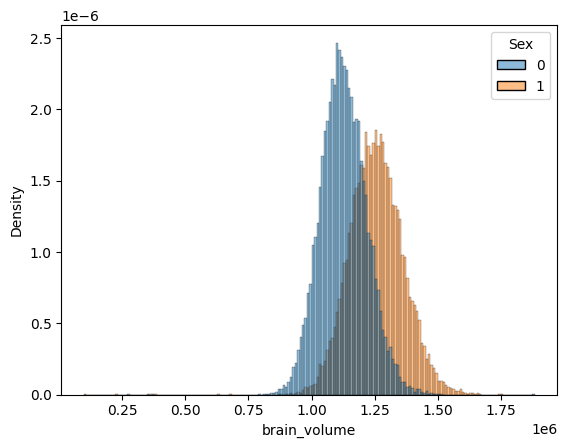

In [30]:
sns.histplot(data=ukb, x="brain_volume", hue="Sex", stat="density", common_norm=False)

<Axes: xlabel='brain_volume', ylabel='Proportion'>

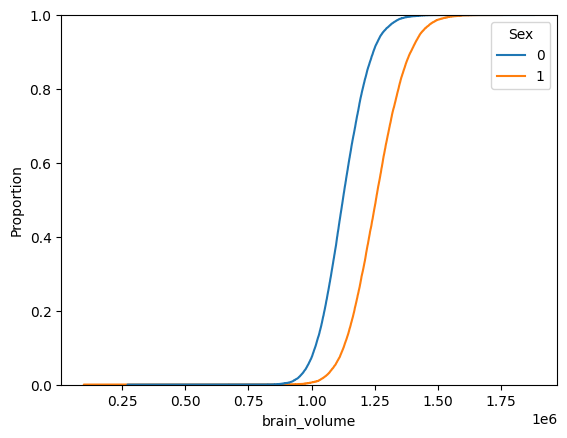

In [48]:
sns.ecdfplot(data=ukb, x="brain_volume", hue="Sex")

<Axes: xlabel='Age', ylabel='Density'>

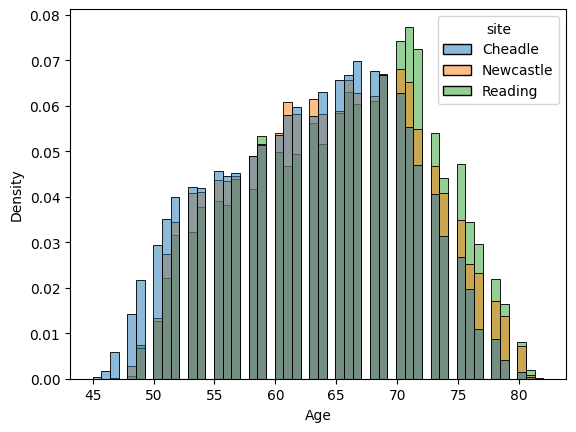

In [45]:
sns.histplot(data=ukb, x="Age", hue="site", stat="density", common_norm=False)

<Axes: xlabel='brain_volume', ylabel='Density'>

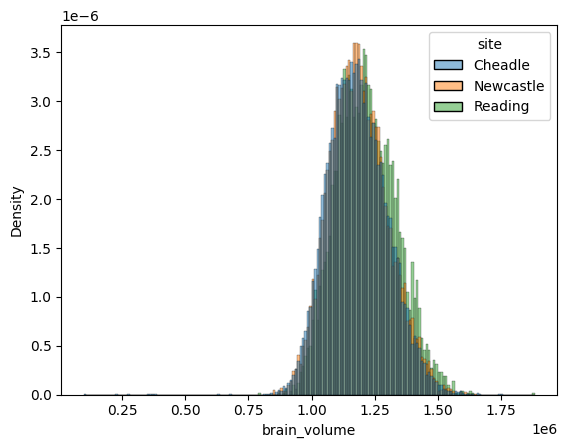

In [32]:
sns.histplot(data=ukb, x="brain_volume", hue="site", stat="density", common_norm=False)

<Axes: xlabel='brain_volume', ylabel='Proportion'>

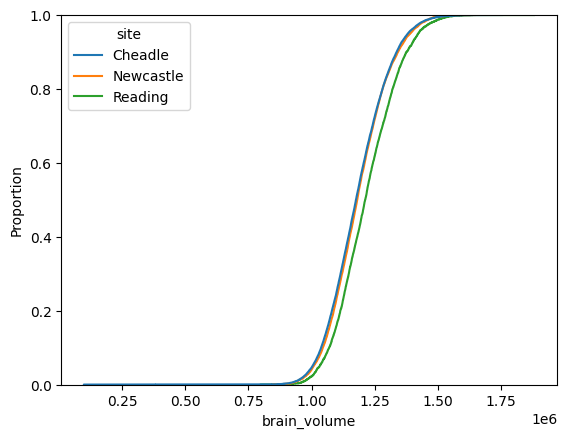

In [33]:
sns.ecdfplot(data=ukb, x="brain_volume", hue="site")

<Axes: xlabel='Age', ylabel='Density'>

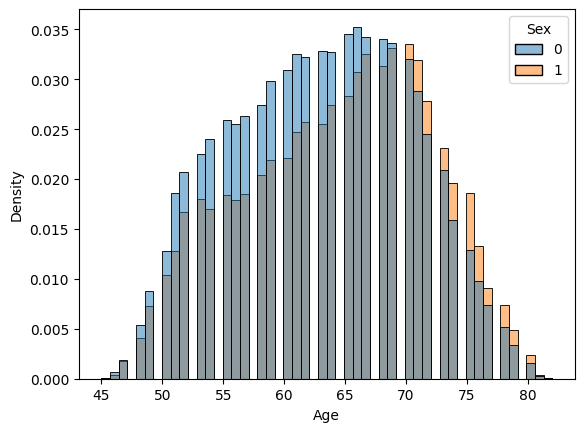

In [25]:
sns.histplot(data=ukb, x="Age", hue="Sex", stat="density")

(750000.0, 1750000.0)

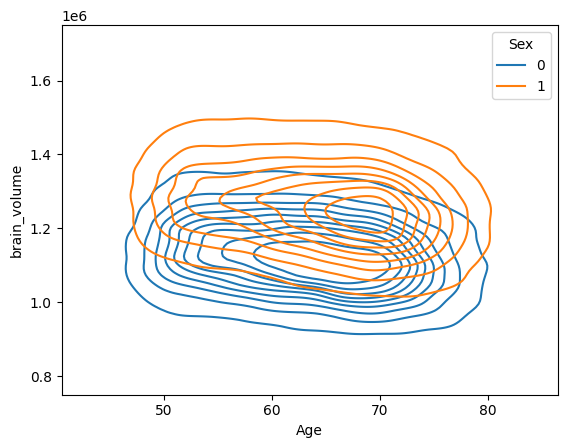

In [44]:
sns.kdeplot(data=ukb, x="Age", y="brain_volume", hue="Sex")
plt.ylim([750000, 1750000])

(750000.0, 1750000.0)

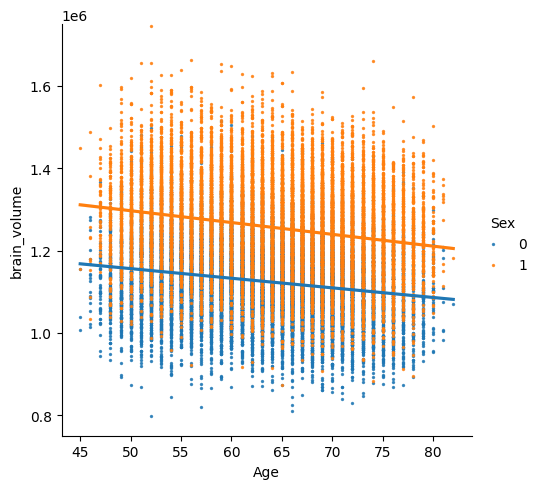

In [43]:
sns.lmplot(data=ukb, x="Age", y="brain_volume", robust=True, scatter_kws={'s':2}, hue="Sex")
plt.ylim([750000, 1750000])

In [6]:
ukb.head()

,Sex,Age,BrainVolumeFreeSurfer_mm3,Ageattendedimaging,ImagingName,isBigBrain,isOld
participant_id,,,,,,,
sub-3411469,1,65.0,1136465.0,65.0,Cheadle,NaN,NaN
sub-2290292,0,69.0,1079118.0,69.0,Newcastle,NaN,NaN
sub-3842391,0,70.0,1124077.0,70.0,Cheadle,NaN,NaN
sub-2758537,1,49.0,1246758.0,49.0,Newcastle,NaN,0.0
sub-4334619,1,70.0,1410387.0,70.0,Cheadle,1.0,NaN


In [47]:
Y = ukb[["brain_volume"]].copy()
X = ukb[["Age"]].copy()
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           brain_volume   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     540.6
Date:                Thu, 10 Oct 2024   Prob (F-statistic):          9.24e-119
Time:                        16:10:00   Log-Likelihood:            -4.9760e+05
No. Observations:               38019   AIC:                         9.952e+05
Df Residuals:                   38017   BIC:                         9.952e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.306e+06   5105.711    255.739      0.000     1.3e+06    1.32e+06
Age        -1852.0505     79.652    -23.252      0.000   -2008.171   -1695.930
==============================================================================
Omnibus:                      605.920   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              873.393
Skew:                           0.191   Prob(JB):                    2.21e-190
Kurtosis:                       3.636   Cond. No.                         546.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""